<div style="text-align: center; color: cyan;">
<h1>Timer Series Forecasting using Prophet<h1>
</div>


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

It works best with time series that have strong seasonal effects and several seasons of historical data. 
Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team.

Prophet decomposes time series data into trend, seasonality and holiday effect.

Trend models non periodic changes in the time series data.

Seasonality is caused due to the periodic changes like daily, weekly, or yearly seasonality.

Holiday effect which occur on irregular schedules over a day or a period of days.

Error terms is what is not explained by the model.

Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.

In [10]:
#%pip install prophet

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [12]:
df=pd.read_csv("AirPassengers.csv")

In [13]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [15]:
df['Month']=pd.DatetimeIndex(df['Month'])

In [16]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

Prophet also imposes the strict condition that the input columns must be named as 
>ds (the time column) and <br>
>y (the metric column).

In [17]:
df.rename(columns={'Month': 'ds','#Passengers': 'y'},inplace=True)

In [18]:
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [19]:
df.set_index("ds")

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [20]:
import plotly.express as px

In [29]:
fig=px.line(df,x='ds',y='y')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Monthly Number of Airline Passengers')
fig.show()

c:\Users\salma\anaconda3\envs\DeepLearningCampusX\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [31]:
Model=Prophet()

In [32]:
Model.fit(df)

21:27:11 - cmdstanpy - INFO - Chain [1] start processing
21:27:11 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future_dates = Model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


In [34]:
forecast = Model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.814159,58.208719,114.910138
1,1949-02-01,78.227931,47.098829,109.547896
2,1949-03-01,110.342237,82.538997,139.590887
3,1949-04-01,107.810718,80.509385,136.716525
4,1949-05-01,111.266255,82.945550,141.777182


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting. 

These are:

>**ds**: the datestamp of the forecasted value <br>
>**yhat**: the forecasted value of our metric<br>
>**yhat_lower**: the lower bound of our forecasts<br>
>**yhat_upper**: the upper bound of our forecasts<br>

Markov chain Monte Carlo (MCMC) methods

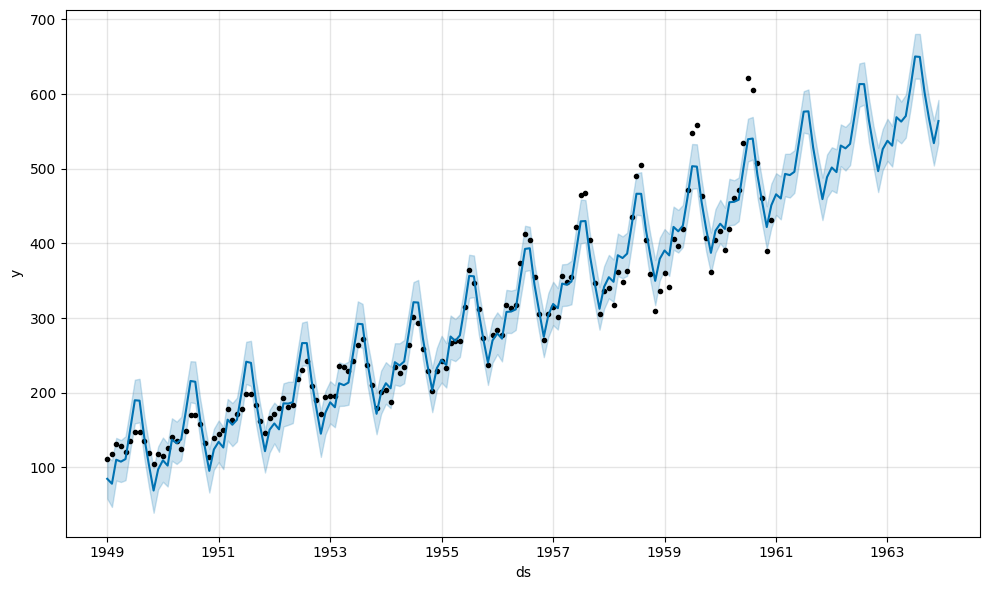

In [37]:
Model.plot(forecast, uncertainty=True);

One other particularly strong feature of Prophet is its ability to return the components of our forecasts.

c:\Users\salma\anaconda3\envs\DeepLearningCampusX\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\salma\anaconda3\envs\DeepLearningCampusX\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\salma\anaconda3\envs\DeepLearningCampusX\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



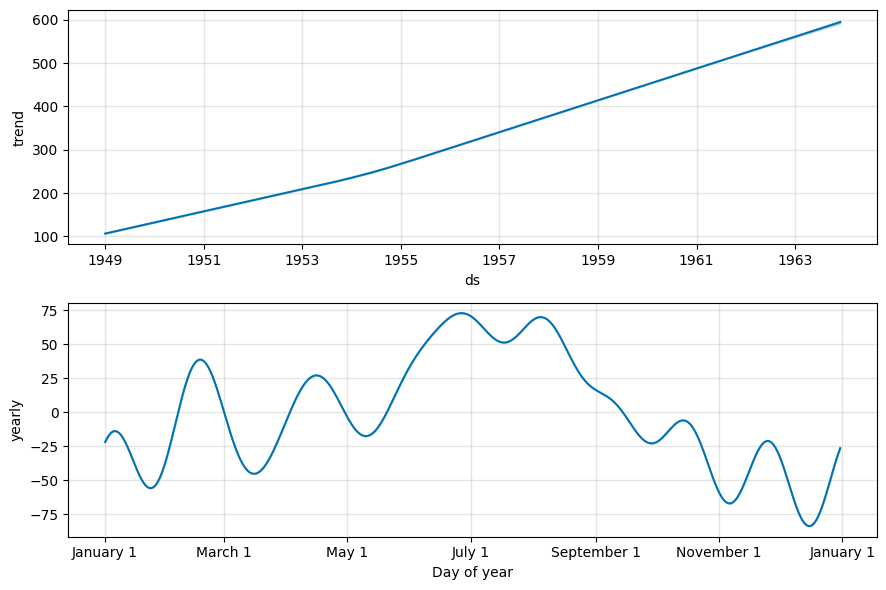

In [39]:
Model.plot_components(forecast);

In [40]:
Model.changepoints

5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]